In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential,load_model
from keras import layers,Input
from keras.losses import binary_crossentropy
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
import keras.backend as K
from keras.constraints import Constraint

2024-07-15 14:59:31.277452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 14:59:32.027974: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 14:59:32.030124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 14:59:35.132988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Old data

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2024-06-06 16:43:00.818016: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
# state0=np.load('/global/homes/n/nrvora/Projects/Quantum/Data/new/2gsps/state0.npy')[:,0:4700].sum(axis=1)
# state1=np.load('/global/homes/n/nrvora/Projects/Quantum/Data/new/2gsps/state1.npy')[:,0:4700].sum(axis=1)


state0=np.load('../Data/ML/030124/state0.npy')[:5000]
state1=np.load('../Data/ML/030124/state1.npy')[:5000]

# state0=np.load('/global/homes/n/nrvora/Projects/Quantum/Data/neel_readout/011124/Q3_data_1µs_05.npy')
# state1=np.load('../Data/ML/030124/state1.npy')
output0=np.zeros((state0.shape[0]))
output1=np.ones((state1.shape[0]))
print(state0.shape,state1.shape)

(5000, 2) (5000, 2)


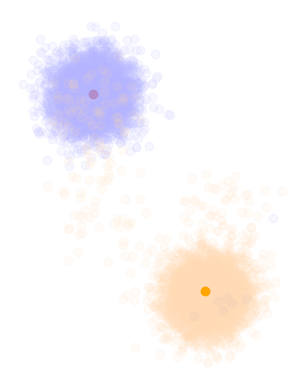

In [4]:


# Calculate mean of each cluster
mean0 = np.mean(state0,axis=0)
mean1 = np.mean(state1,axis=0)

# Define lighter color palette
lighter_blue = (0.7, 0.7, 1.0)
lighter_orange = (1.0, 0.85, 0.7)

# Plot points with lighter colors
plt.scatter(state0[:,0], state0[:,1], color=lighter_blue, alpha=0.1)
plt.scatter(state1[:,0], state1[:,1], color=lighter_orange, alpha=0.1)

# Highlight mean of each cluster with a brighter color
plt.scatter(mean0[0], mean0[1], color=(0.7, 0.55, 0.8), marker='o', label='State0')
plt.scatter(mean1[0], mean1[1], color='orange', marker='o', label='State1')

plt.xlabel('I',fontsize=12)
plt.ylabel('Q',fontsize=12)
# plt.legend(fontsize='large')

plt.axis('off')  # Remove axis
plt.gcf().set_facecolor('none')
plt.gca().set_aspect('equal')
plt.savefig('images/Q1_TWPA.png', dpi=300,transparent=True)
plt.show()

In [5]:
x=np.concatenate((state0,state1),axis=0)
print(x.shape)
y=np.hstack((output0,output1))
print(y.shape)

(10000, 2)
(10000,)


## Rotate and line

In [ ]:
# Calculate mean of each cluster
mean0_complex = np.mean(state0,axis=0)
mean1_complex = np.mean(state1,axis=0)

# Define lighter color palette
lighter_blue = (0.7, 0.7, 1.0)
lighter_orange = (1.0, 0.85, 0.7)

# Plot points with lighter colors
plt.scatter(state0[:,0], state0[:,1], color=lighter_blue, alpha=0.1)
plt.scatter(state1[:,0], state1[:,1], color=lighter_orange, alpha=0.1)

# Highlight mean of each cluster with a brighter color
plt.scatter(mean0_complex[0], mean0_complex[1], color=(0.7, 0.55, 0.8), marker='o', label='State0')
plt.scatter(mean1_complex[0], mean1_complex[1], color='orange', marker='o', label='State1')
plt.xlim(-2.5e6,2.5e6)
plt.ylim(-2.5e6,2.5e6)

plt.xlabel('I')
plt.ylabel('Q')
plt.title('Q1')
plt.legend(fontsize='large')
plt.gca().set_aspect('equal')
# plt.axis('off')  # Remove axis
plt.grid('true')
plt.gcf().set_facecolor('none')
plt.savefig('images/tmp.png', dpi=500,transparent=True)
plt.show()

In [ ]:
count0=0
for i in range(state0.shape[0]):
    if state0[i,0]>0:
        count0+=1
print(count0/state0.shape[0])
acc0=count0/state0.shape[0]

count1=0
for i in range(state1.shape[0]):
    if state1[i,0]<0:
        count1+=1
print(count1/state1.shape[0])
print(state0.shape,state1.shape)
acc1=count1/state1.shape[0]
print((acc0+acc1)/2)

In [ ]:

import math
angle0=math.atan2(mean0_complex[1], mean0_complex[0])
angle1=math.atan2(mean1_complex[1], mean1_complex[0])
print((angle0+angle1)/2)
print(np.pi/2-((angle0+angle1)/2))


## Plot

In [ ]:
import matplotlib.pyplot as plt 
x_T = x - [3e6,-5.5e6]
meanT= np.mean(x_T,axis=0)

x_M = x_T - meanT
meanM = np.mean(x_M,axis=0)
lighter_blue = (0.7, 0.7, 1.0)
lighter_orange = (1.0, 0.85, 0.7)
plt.gca().set_aspect('equal')

greyish_shade_state0 = (0.85, 0.85, 0.85)


# Plot scatter points for translated states with greyish shade
plt.scatter(x_T[:, 0], x_T[:, 1], color=greyish_shade_state0, alpha=0.1)
plt.scatter(meanT[0], meanT[1], color=(0.5,0.5,0.5), marker='o', label='Orignal')
plt.grid(True)

plt.scatter(x_M[:,0],x_M[:,1],color=lighter_orange, alpha=0.1)
plt.scatter(meanM[0], meanM[1], color='orange', marker='o', label='Moved')
plt.legend()
plt.savefig('images/moving.svg', dpi=500,transparent=True)
plt.show()

In [ ]:
print(x_M[:,0].max(),x_M[:,0].min())
print(x_M[:,1].max(),x_M[:,1].min())
'''Let min and max be 2^18'''

x_M[:,0]=(x_M[:,0]+(2**23)-1)/(2**24)
x_M[:,1]=(x_M[:,1]+(2**22)-1)/(2**23)
print(x_M[:,0].max(),x_M[:,0].min())
print(x_M[:,1].max(),x_M[:,1].min())

In [ ]:
# plt.gca().set_aspect('equal')
plt.grid(True)
meanM = np.mean(x_M,axis=0)
plt.scatter(x_M[:,0],x_M[:,1],color=lighter_orange, alpha=0.1)
plt.scatter(meanM[0], meanM[1], color='orange', marker='o', label='Normalized')
plt.legend()
plt.savefig('images/normalized.svg', dpi=500,transparent=True)
plt.show()


## Min-Max

318464.7493 62778.6437


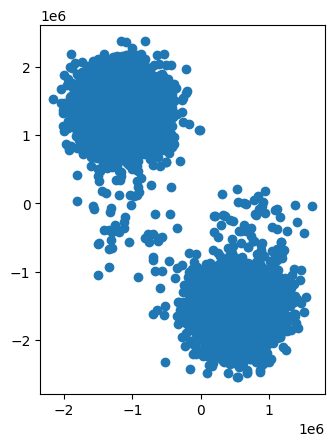

In [6]:
import matplotlib.pyplot as plt 
plt.gca().set_aspect('equal')
plt.scatter(x[:,0],x[:,1])
print(-x[:,0].mean(), -x[:,1].mean())

In [7]:
# x[:,0] += -120858
# x[:,1] += -121355
print(x[:,0].max(),x[:,0].min())
print(x[:,1].max(),x[:,1].min())

1625487.0 -2159652.0
2372533.0 -2543565.0


0.8875460624694824 -0.014901399612426758
1.0656557083129883 -0.10643339157104492


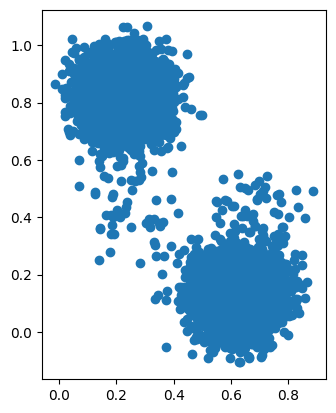

In [8]:
'''Let min and max be 2^18'''

x[:,0]=(x[:,0]+(2**21)-1)/(2**22)
x[:,1]=(x[:,1]+(2**21)-1)/(2**22)
print(x[:,0].max(),x[:,0].min())
print(x[:,1].max(),x[:,1].min())
plt.gca().set_aspect('equal')
plt.scatter(x[:,0],x[:,1])

In [9]:
x=np.round(x,4)
print(x)

[[0.14   0.7912]
 [0.286  0.849 ]
 [0.1354 0.8417]
 ...
 [0.6581 0.0375]
 [0.615  0.0458]
 [0.6677 0.1957]]


In [10]:

# st,ed=700,4700
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=45)
print(x_train.shape)
print(y_train.sum())
print(x_train.shape)

(8000, 2)
3990.0
(8000, 2)


## PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x=np.vstack((state0,state1))
print(x.shape)
y=np.hstack((output0,output1))
print(y.shape)
sc = StandardScaler()
sc = StandardScaler()
x=x[:,700:2700,:].sum(axis=1)
X= sc.fit_transform(x)
# X_test = sc.transform(x_test)
pca = PCA(n_components = 1)
X = pca.fit_transform(X)
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())
# X_test = pca.transform(X_test)
print("X shape: {}".format(X.shape))
x_red =X[y[:] == 1, 0]  # Use y[:, 0] for indexing
x_blue = X[y[:] == 0, 0] 

# Create a histogram with two different colors
plt.hist(x_blue, bins=50, color='blue', alpha=0.7, label='y=0')
plt.hist(x_red, bins=50, color='red', alpha=0.7, label='y=1')
# Add labels and legend
plt.xlabel('Scaled values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

## Line on center

In [ ]:
µ0=np.mean(state0,axis=0)
µ1=np.mean(state1,axis=0)
plt.scatter(state0[:,0],state0[:,1],alpha=0.1,label='state0')
plt.scatter(state1[:,0],state1[:,1],alpha=0.1,label='state1')
plt.scatter(µ0[0],µ0[1])
plt.scatter(µ1[0],µ1[1])

#Line
m=(µ1[1]-µ0[1])/(µ1[0]-µ0[0])
b=µ0[1]-(m*µ0[0])
plt.plot([µ0[0],µ1[0]],[µ0[1],µ1[1]])
center = [(µ1[0]+µ0[0])/2,(µ1[1]+µ0[1])/2]
plt.scatter(center[0],center[1])

#Orthogonal
mO=-1/m
bO=center[1]-(mO*center[0])
x1,x2=0.05e6,-0.05e6
y1,y2=(x1*mO)+bO,(x2*mO)+bO
plt.plot([x1,x2,center[0]],[y1,y2,center[1]],color='red')
plt.gca().set_aspect('equal', adjustable='box')

#Vector
vector_x = µ0[0]-center[0]
vector_y = µ0[1]-center[1]
vector=[vector_x,vector_y]
plt.quiver(center[0], center[1], vector_x, vector_y, angles='xy', scale_units='xy', scale=1, color='purple', label='Vector')
plt.legend()
plt.show()

## Logistic Regression

In [ ]:
# x_trainC=x_train.reshape((x_train.shape[0],x_train.shape[1]*2))
# x_testC=x_test.reshape((x_test.shape[0],x_test.shape[1]*2))
classifier = LogisticRegression(random_state = 42, max_iter=500)
classifier.fit(x_train, y_train)
print(classifier.score(x_test,y_test))
pred = classifier.predict(x_test)

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:,0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = classifier.predict(x_in)
y_pred = np.round(y_pred).reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(x[:,0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## SVM

In [ ]:
model=SVC(kernel='rbf',decision_function_shape='ovo',probability=True)
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
pred=model.predict(x_test)

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:,0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = model.predict(x_in)
y_pred = np.round(y_pred).reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
plt.scatter(x[:,0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

## GMM

In [ ]:
Y=list(zip(np.append(np.mean(state0[:,st:ed,0],axis=1),np.mean(state1[:,st:ed,0],axis=1)),np.append(np.mean(state0[:,st:ed,1],axis=1),np.mean(state1[:,st:ed,1],axis=1))))
gmm_Y=GaussianMixture(n_components=2,covariance_type='full').fit(Y)
bitstring=np.split(gmm_Y.predict(Y),2)
print('P(0|0)=',len(bitstring[0][bitstring[0]==0])/len(bitstring[0]))
print('P(1|1)=',len(bitstring[1][bitstring[1]==1])/len(bitstring[1]))
X=list(zip(np.mean(state0[:,st:ed,0],axis=1),np.mean(state0[:,st:ed,1],axis=1)))
gmm_Y_1=GaussianMixture(n_components=1,covariance_type='spherical').fit(X)
X=list(zip(np.mean(state1[:,st:ed,0],axis=1),np.mean(state1[:,st:ed,1],axis=1)))
gmm_Y_2=GaussianMixture(n_components=1,covariance_type='spherical').fit(X)

## NN

### Model Training

In [16]:
class WeightConstraint(Constraint):
    def __init__(self, min_value=-2, max_value=2, precision=6):
        self.min_value = min_value
        self.max_value = max_value
        self.precision = precision

    def __call__(self, w):
        clipped = K.clip(w, self.min_value, self.max_value)
        return K.round(clipped * 10**self.precision) / 10**self.precision

    def get_config(self):
        return {'min_value': self.min_value, 'max_value': self.max_value, 'precision': self.precision}


def arch():
    model=Sequential()
    model.add(Input(shape=(2)))
    # model.add(Dense(8,activation='relu', name='HiddenLayer1'))#,kernel_constraint=WeightConstraint()))
    # model.add(Dense(4,activation='relu', name='HiddenLayer2'))#,kernel_constraint=WeightConstraint()))
    model.add(Dense(1,activation='sigmoid', name='OuputLayer'))#,kernel_constraint=WeightConstraint()))
    return model
arch().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 OuputLayer (Dense)          (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model=arch()
model.summary
model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model_path="../Model/NN2/tmp/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [18]:
H=model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
        #   validation_split=0.2,
          epochs=100,batch_size=64,
        #   callbacks=callbacks_list,
          verbose=1)

Epoch 1/100


125/125 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.9886 - val_loss: 0.5010 - val_accuracy: 0.9865
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.9891 - val_loss: 0.4764 - val_accuracy: 0.9870
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.9891 - val_loss: 0.4537 - val_accuracy: 0.9865
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.9890 - val_loss: 0.4327 - val_accuracy: 0.9865
Epoch 5/100
125/125 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.9887 - val_loss: 0.4130 - val_accuracy: 0.9865
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.9887 - val_loss: 0.3945 - val_accuracy: 0.9865
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.9887 - val_loss: 0.3770 - val_accuracy: 0.9865
Epoch 8/100

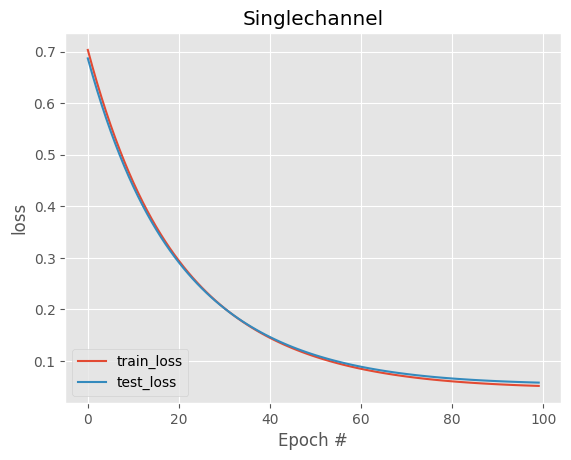

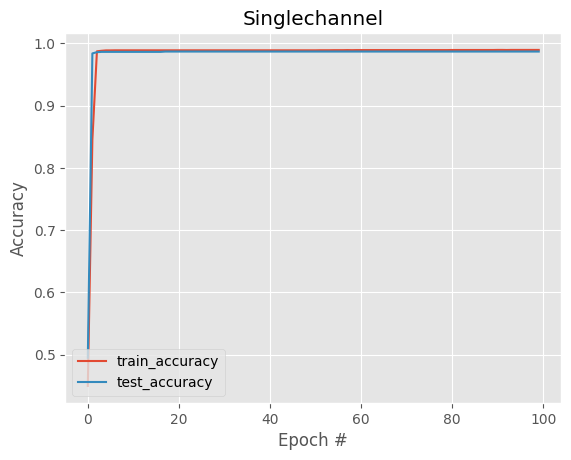

In [17]:
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="test_loss")
plt.title("Singlechannel")
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend(loc="lower left")

N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="test_accuracy")
plt.title("Singlechannel")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

### Model Testing

In [19]:
# def custom_objects():
#     return {'WeightConstraint': WeightConstraint}
# model=load_model('/global/homes/n/nrvora/Projects/Quantum/Model/NN2/tmp/96-0.0038-0.9994.h5', custom_objects=custom_objects())
# model=load_model('/global/homes/n/nrvora/Projects/Quantum/Model/NN2/Best/Q2-0.9869.h5')
count=0
count1=0
y_pred=model.predict(x)
for i in range(y_pred.shape[0]):
    if y[i]==0:
        count+=1
        if y_pred[i]<0.5:
            count1+=1
print(count,count1)
print(count1/count,'\n*********')

count=0
count1=0
for i in range(y_pred.shape[0]):
    if y[i]==1:
        count+=1
        if y_pred[i]>=0.5:
            count1+=1
print(count,count1)
print(count1/count)

313/313 [==============================] - 0s 462us/step
5000 4993
0.9986 
*********
5000 4896
0.9792


In [20]:
313/313 [==============================] - 0s 473us/step
5000 4993
0.9986 
*********
5000 4919
0.9838




SyntaxError: invalid syntax (1037174138.py, line 1)

### Weights and Bias extraction

In [21]:
# model=load_model('..//Model/NN2/Best/96.6_Q3.h5', compile=False)
all_weights = model.get_weights()

# Print the shape of each layer's weights and biases
for i, weights in enumerate(all_weights):
    print(f"Layer {i} weights shape:", weights)

Layer 0 weights shape: [[ 8.441398 ]
 [-7.8927445]]
Layer 1 weights shape: [0.6523963]


In [ ]:
all_weights = model.get_weights()
w,b=[],[]
for k,i in enumerate(all_weights):
    if k%2==0:
        for j in i:
            for l in j:
                w.append(l)
    else:
        for j in i:
            b.append(j)
print("Weights : ",w)
print("Bias : ",b)

In [ ]:
def convert27(x):
    integer,fraction=(divmod(x, 1))
    acc_frac=int(fraction*(2**17))
    fraction_binary=str(bin(acc_frac & 0xFFFFF)[2:].zfill(17))
    if (int(integer)>=0):
        integer_binary=str(bin(int(integer) & 0xFFF)[2:].zfill(10))
    else:
        integer_binary=str(bin(int(integer) & 0b1111111111)[2:].zfill(10))
    binary_value = integer_binary+fraction_binary 
    integer_value = binary_to_integer(binary_value)
    return integer_value
    
def binary_to_integer(binary_string):
    decimal_value = int(binary_string, 2)
    return decimal_value

def convert18(x):
    integer,fraction=(divmod(x, 1))
    acc_frac=int(fraction*(2**12))
    fraction_binary=str(bin(acc_frac & 0xFFFF)[2:].zfill(12))
    if (int(integer)>=0):
        integer_binary=str(bin(int(integer) & 0xFF)[2:].zfill(6))
    else:
        integer_binary=str(bin(int(integer) & 0b111111)[2:].zfill(6))
    binary_value = integer_binary+fraction_binary 
    integer_value = binary_to_integer(binary_value)
    return integer_value

w_bin,b_bin=[],[]
for i in w:
    w_bin.append(convert18(i))
for i in b:
    b_bin.append(convert27(i))

print("Weights : ",w_bin)
print("Bias : ",b_bin)

### Confidence Boundary

In [ ]:
tmp=[[2, 2]]
tmp = np.reshape(tmp, (1, 2))
layer_outputs = []
for layer in model.layers:
    get_post_activation_output = K.function([model.input], [layer.output])
    layer_outputs.append((get_post_activation_output))

# Get the output of each layer for your input data
post_activation_outputs = []
for get_post_activation_output in layer_outputs:
    post_activation_outputs.append(get_post_activation_output([x])[0])

# Show the output of each layer
for i, post_activation_output in enumerate(post_activation_outputs):
    print("Layer {}: Post-activation output: {}".format(i, post_activation_output))
print(model.predict(tmp))

In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:,0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = model.predict(x_in)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.contour(xx, yy, y_pred, colors='red', linewidths=0.2)
# plt.scatter(x[:,0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
plt.axis('off')  # Remove axis
plt.gcf().set_facecolor('none')
plt.savefig('images/Q3_desc_twpa.svg', dpi=500,transparent=True)

In [ ]:
# Define st and en
st, en = 0, 3700

# Calculate sums
sum0_complex = np.sum(state0_complex[:, st:en], axis=1)
sum1_complex = np.sum(state1_complex[:, st:en], axis=1)

# Calculate mean of each cluster
mean0_complex = np.mean(sum0_complex)
mean1_complex = np.mean(sum1_complex)

# Define lighter color palette
lighter_blue = (0.7, 0.7, 1.0)
lighter_orange = (1.0, 0.85, 0.7)

# Plot points with lighter colors
plt.scatter(sum0_complex.real, sum0_complex.imag, color=lighter_blue, alpha=0.1)
plt.scatter(sum1_complex.real, sum1_complex.imag, color=lighter_orange, alpha=0.1)

# Highlight mean of each cluster with a brighter color
plt.scatter(mean0_complex.real, mean0_complex.imag, color=(0.7, 0.55, 0.8), marker='o', label='State0')
plt.scatter(mean1_complex.real, mean1_complex.imag, color='orange', marker='o', label='State1')

plt.xlabel('I',fontsize=12)
plt.ylabel('Q',fontsize=12)
plt.legend(fontsize='large')

plt.axis('off')  # Remove axis
plt.gcf().set_facecolor('none')
plt.savefig('images/with_ramp.svg', dpi=500,transparent=True)
plt.show()

In [ ]:
np.save('../Model/NN2/Best/Q2_x_text.npy',x_test)
np.save('../Model/NN2/Best/Q2_y_test.npy',y_test)


## MultiChannel

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
# def plotCluster(s0I,s0Q,s1I,s1Q,e0I,e0Q,e1I,e1Q,f0I,f0Q,f1I,f1Q,):
#     fig = make_subplots(rows=1, cols=1)
#     trace0 = go.Scatter(x=s0I, y=s0Q, name='0-500_|0>',mode='markers',line=dict(color='blue'),marker=dict(size=8, symbol='circle-open'))
#     trace1 = go.Scatter(x=s1I, y=s1Q, name='0-500_|1>',mode='markers',line=dict(color='red'),marker=dict(size=8,symbol='square-open'))
#     trace2 = go.Scatter(x=e0I, y=e0Q, name='500-1000_|0>',mode='markers',line=dict(color='black'),marker=dict(size=8,symbol='star-open'))
#     trace3 = go.Scatter(x=e1I, y=e1Q, name='500-1000_|1>',mode='markers',line=dict(color='green'),marker=dict(size=8, symbol='diamond-open'))
#     trace4 = go.Scatter(x=f0I, y=f0Q, name='1000-1500_|0>',mode='markers',line=dict(color='orange'),marker=dict(size=8,symbol='square-cross-open'))
#     trace5 = go.Scatter(x=f1I, y=f1Q, name='1000-1500_|1>',mode='markers',line=dict(color='pink'),marker=dict(size=8, symbol='diamond-cross-open'))
#     fig.add_trace(trace0)
#     fig.add_trace(trace1)
#     fig.add_trace(trace2)
#     fig.add_trace(trace3)
#     fig.add_trace(trace4)
#     fig.add_trace(trace5)
#     # Set the layout
#     fig.update_layout(
#         title="Signals 0-500-1000-1500",
#         xaxis_title="I",
#         yaxis_title="Q",
#         showlegend=True,
#         width=800,  # Set the width of the plot
#         height=400,  # Set the height of the plot
#     )
#     return fig  

def plotCluster(s0I,s0Q,s1I,s1Q, name1, name2):
    fig = make_subplots(rows=1, cols=1)
    trace0 = go.Scatter(x=s0I, y=s0Q, name=name1,mode='markers',line=dict(color='blue'),marker=dict(size=8, symbol='circle-open'))
    trace1 = go.Scatter(x=s1I, y=s1Q, name=name2,mode='markers',line=dict(color='red'),marker=dict(size=8,symbol='square-open'))
    fig.add_trace(trace0)
    fig.add_trace(trace1)
    # Set the layout
    fig.update_layout(
        title="Signals",
        xaxis_title="I",
        yaxis_title="Q",
        showlegend=True,
        width=800,  # Set the width of the plot
        height=400,  # Set the height of the plot
    )
    return fig  

In [ ]:
# state0_500= np.mean(state0[:,700:1700,:],axis=1)
# state1_500= np.mean(state1[:,700:1700,:],axis=1)
# state0_1000= np.mean(state0[:,1700:2700,:],axis=1)
# state1_1000= np.mean(state1[:,1700:2700,:],axis=1)
# state0_1500= np.mean(state0[:,2700:3700,:],axis=1)
# state1_1500= np.mean(state1[:,2700:3700,:],axis=1)
# state0_4=np.hstack((state0_500,state0_1000,state0_1500))
# state1_4=np.hstack((state1_500,state1_1000,state1_1500))

# indices = np.arange(6000)
# np.random.shuffle(indices)
# selected_indices = indices[:1000]
# random0 = state0_4[selected_indices]
# random1 = state1_4[selected_indices]


# print(random0.shape)

In [ ]:
state0_100= np.sum(state0[:,1500:1700,:],axis=1)
state1_100= np.sum(state1[:,1500:1700,:],axis=1)
state0_200= np.sum(state0[:,1900:2100,:],axis=1)
state1_200= np.sum(state1[:,1900:2100,:],axis=1)
state0_300= np.sum(state0[:,2100:2300,:],axis=1)
state1_300= np.sum(state1[:,2100:2300,:],axis=1)
state0_400= np.sum(state0[:,2300:2500,:],axis=1)
state1_400= np.sum(state1[:,2300:2500,:],axis=1)
state0_500= np.sum(state0[:,2500:2700,:],axis=1)
state1_500= np.sum(state1[:,2500:2700,:],axis=1)
state0_4=np.hstack((state0_100,state0_200,state0_300,state0_400,state0_500))
state1_4=np.hstack((state1_100,state1_200,state1_300,state1_400,state1_500))

indices = np.arange(6000)
np.random.shuffle(indices)
selected_indices = indices[:1000]
random0 = state0_4[selected_indices]
random1 = state1_4[selected_indices]


print(random0.shape)

In [ ]:
# plotCluster(random0[:,0], random0[:,1], random1[:,0], random1[:,1], random0[:, 2], random0[:, 3], random1[:,2], random1[:,3],random0[:, 4], random0[:, 5], random1[:,4], random1[:,5])
plotCluster(random0[:,0], random0[:,1], random1[:,0], random1[:,1],'500-600_|0>', '500-600_|1>').show()
plotCluster(random0[:, 2], random0[:, 3], random1[:,2], random1[:,3],'600-700_|0>', '600-700_|1>').show()
plotCluster(random0[:, 4], random0[:, 5], random1[:,4], random1[:,5],'700-800_|0>', '700-800_|1>').show()
plotCluster(random0[:,6], random0[:,7], random1[:,6], random1[:,7],'800-900_|0>', '800-900_|1>').show()
plotCluster(random0[:, 8], random0[:, 9], random1[:,8], random1[:,9],'900-1000_|0>', '900-1000_|1>').show()
# plotCluster(np.sum(state0[selected_indices,1700:3700, 0],axis=1), np.sum(state0[selected_indices,1700:3700, 1],axis=1), np.sum(state1[selected_indices,1700:3700,0],axis=1), np.sum(state1[selected_indices,1700:3700,1],axis=1),'900-1000_|0>', '900-1000_|1>').show()


In [ ]:
x=np.vstack((state0_4,state1_4))
print(x.shape)
y=np.hstack((output0,output1))
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=45)
print(x_train.shape)
print(y_train.sum())

In [ ]:
def arch():
    model=Sequential()
    model.add(Input(shape=(10), name='Input Layer'))
    model.add(Dense(16,activation='relu', name='HiddenLayer1'))
    model.add(Dense(4,activation='relu', name='HiddenLayer2'))
    model.add(Dense(1,activation='sigmoid', name='OuputLayer'))
    return model
arch().summary()

model=arch()
model.summary
opt=SGD( learning_rate=0.01, momentum=0.9)
model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model_path="../Model/NN2/tmp/{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

H=model.fit(x_train,y_train,
          validation_split=0.2,
          epochs=100,batch_size=64,
        #   callbacks=callbacks_list,
          verbose=1)
# model=load_model('../Model/NN2/tmp/29-0.7716.h5', compile=False)
count=0
count1=0
y_pred=model.predict(x_test)
for i in range(y_pred.shape[0]):
    if y_test[i]==0:
        count+=1
        if y_pred[i]<=0.5:
            count1+=1
print(count,count1)

count=0
count1=0
y_pred=model.predict(x_test)
for i in range(y_pred.shape[0]):
    if y_test[i]==1:
        count+=1
        if y_pred[i]>=0.5:
            count1+=1
print(count,count1)

In [ ]:
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="test_loss")
plt.title("Multichannel")
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend(loc="lower left")

N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="test_accuracy")
plt.title("Multichannel")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


threshold = 0.5
y_pred = (y_pred > threshold).astype(int)
conf_mat = confusion_matrix(y_test, y_pred)

# Calculate percentages
conf_mat_percentage = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Create a heatmap for better visualization with percentages
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Percentages)")
plt.show()

## New

In [ ]:
state0=np.stack((np.load('../Data/neel_readout/120923/state0_15µs_cos.npy').real,np.load('../Data/neel_readout/120923/state0_15µs_cos.npy').imag),axis=1)
state1=np.stack((np.load('../Data/neel_readout/120923/state1_15µs_cos.npy').real,np.load('../Data/neel_readout/120923/state1_15µs_cos.npy').imag),axis=1)
output0=np.zeros((state0.shape[0]))
output1=np.ones((state1.shape[0]))
print(state0.shape)

In [ ]:
x=np.vstack((state0,state1))
print(x.shape)
y=np.hstack((output0,output1))
print(y.shape)

min,max= -(2**20),(2**20)
print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))
x= (x-min)/(max-min)
print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=45)
print(x_train.shape)
print(y_train.sum())

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(x)
pca = PCA(n_components = 1)
X = pca.fit_transform(X)
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())
# X_test = pca.transform(X_test)
print("X shape: {}".format(X.shape))
x_red =X[y[:] == 1, 0]  # Use y[:, 0] for indexing
x_blue = X[y[:] == 0, 0] 

# Create a histogram with two different colors
plt.hist(x_blue, bins=50, color='blue', alpha=0.7, label='y=0')
plt.hist(x_red, bins=50, color='red', alpha=0.7, label='y=1')
# Add labels and legend
plt.xlabel('Scaled values')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [ ]:
classifier = LogisticRegression(random_state = 42, max_iter=500)
classifier.fit(x_train, y_train)
print(classifier.score(x_test,y_test))
pred = classifier.predict(x_test)

In [ ]:
model=SVC(decision_function_shape='ovo')
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
pred=model.predict(x_test)

In [ ]:
def arch():
    model=Sequential()
    model.add(Input(shape=(2), name='Input Layer'))
    model.add(Dense(8,activation='relu', name='HiddenLayer1'))
    model.add(Dense(4,activation='relu', name='HiddenLayer2'))
    model.add(Dense(1,activation='sigmoid', name='OuputLayer'))
    return model
arch().summary()

model=arch()
model.summary
opt=SGD( learning_rate=0.01, momentum=0.9)
model.compile(loss=binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model_path="../Model/NN2/tmp/{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

H=model.fit(x_train,y_train,
          validation_split=0.2,
          epochs=100,batch_size=64,
        #   callbacks=callbacks_list,
          verbose=1)
# model=load_model('../Model/NN2/tmp/29-0.7716.h5', compile=False)
count=0
count1=0
y_pred=model.predict(x_test)
for i in range(y_pred.shape[0]):
    if y_test[i]==0:
        count+=1
        if y_pred[i]<=0.5:
            count1+=1
print(count,count1)

count=0
count1=0
y_pred=model.predict(x_test)
for i in range(y_pred.shape[0]):
    if y_test[i]==1:
        count+=1
        if y_pred[i]>=0.5:
            count1+=1
print(count,count1)